## Visual data processing using convolutional neural networks

This algorithm is a example of how to use convolutional neural networks in visual data processing. The challenge is to predict the objects showed in images. First, a dataset collected from keras is divided in training and testing data. Next, a model is built with keras and tensorflow, using the training data. The model will be used to predict the object on the testing data. 

In [12]:
import tensorflow as tf
import keras
from keras.datasets import cifar10 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import keras.utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

Separating dataset in training and testing data, also a labels list is created to facilitate the visualization of the model performance.

In [13]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Reshaping data. The '-1' specified that all the data is collected, the (32, 32) are the shape of (x, y) axis and '3' is a parameter on keras to deal with RGB images.

In [14]:
train_X = train_X.reshape(-1, 32, 32, 3)
test_X = test_X.reshape(-1, 32, 32, 3)

Setting values to the range [0, 1] will improve time rate.

In [15]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

The model can't work with categorical data in the output directly, therefore one hot enconding will be considered.

In [16]:
train_Y_one_hot = tf.keras.utils.to_categorical(train_Y)
test_Y_one_hot = tf.keras.utils.to_categorical(test_Y)

Building the model.

In [17]:
model = Sequential()
model.add(Conv2D(100, (3,3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Fitting the model with the training data.

In [18]:
model.fit(train_X, train_Y_one_hot, batch_size=100, epochs=10)

Epoch 1/10
500/500 [==============================] - 181s 361ms/step - loss: 1.4367 - accuracy: 0.4869
Epoch 2/10
500/500 [==============================] - 165s 331ms/step - loss: 1.0850 - accuracy: 0.6212
Epoch 3/10
500/500 [==============================] - 164s 328ms/step - loss: 0.9655 - accuracy: 0.6665
Epoch 4/10
500/500 [==============================] - 163s 325ms/step - loss: 0.8970 - accuracy: 0.6883
Epoch 5/10
500/500 [==============================] - 162s 325ms/step - loss: 0.8275 - accuracy: 0.7145
Epoch 6/10
500/500 [==============================] - 165s 329ms/step - loss: 0.7859 - accuracy: 0.7274
Epoch 7/10
500/500 [==============================] - 164s 328ms/step - loss: 0.7483 - accuracy: 0.7404
Epoch 8/10
500/500 [==============================] - 163s 325ms/step - loss: 0.7091 - accuracy: 0.7546
Epoch 9/10
500/500 [==============================] - 163s 326ms/step - loss: 0.6744 - accuracy: 0.7661
Epoch 10/10
500/500 [==============================] - 161s 323m

Calculating model accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)


313/313 [==============================] - 10s 31ms/step - loss: 0.9002 - accuracy: 0.7066
Test loss 0.9002060294151306
Test accuracy 0.70660001039505


Testing model with random images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 9999 + 1) instead
  


Its a dog


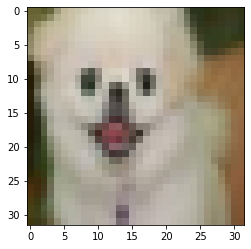

In [24]:

i = np.random.random_integers(0, 9999, 1)[0]
predictions = model.predict(test_X)
print(f'Its a {labels[np.argmax(np.round(predictions[i]))]}')
plt.imshow(test_X[i])
plt.show()